In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Veri setini ekliyoruz.
##### Veri Seti; 1957'den 2020'ye Uzay'a roket gönderen kuruluşlar, roketin fırlatıldığı lokasyon, roketin detayları, roketin aktif veya emekli olduğu ve görev sonucuyla ilgili bilgi veren sütunlar bulunuyor.

In [5]:
dataset = pd.read_csv("Space_Corrected.csv")

In [6]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
dataset.tail()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


#### Roketin maliyetini belirten 'Rocket' sütununda 3360 adet boş değer bulunuyor.

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [9]:
dataset.isnull().any()

Unnamed: 0.1      False
Unnamed: 0        False
Company Name      False
Location          False
Datum             False
Detail            False
Status Rocket     False
 Rocket            True
Status Mission    False
dtype: bool

In [10]:
dataset.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

#### İndeks ile aynı değerleri almış 'Unnamed: 0.1' ve 	'Unnamed: 0' adında iki sütun bulunuyor. Bunlar analizimde herhangi bir işe yaramayacağı için siliyorum.

In [11]:
df = dataset.copy()

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [13]:
df.drop(["Unnamed: 0.1","Unnamed: 0"],axis=1,inplace=True)

In [14]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


#### Bazı kolonlardaki benzersiz  değerleri kontrol ediyorum.

In [15]:
df["Company Name"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [16]:
df["Status Rocket"].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [17]:
df["Status Mission"].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

#### En çok fırlatma yapan 10 kuruluşu gruplandırıyor ve bunlar ile ilgili görselleştirme yapıyorum

In [18]:
top_10_company = dataset["Company Name"].value_counts().head(10).reset_index()
top_10_company

,Company Name,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


##### Bu grafikte
- Rusya büyük bir farkla öne çıkıyor. 
- Bu büyük farkın nedeninin, merkeziyetçi yapısı sayesinde fırlatmaların daha kıstlı kuruluşların çatısı altında yapılması olduğu söylenebilir. 


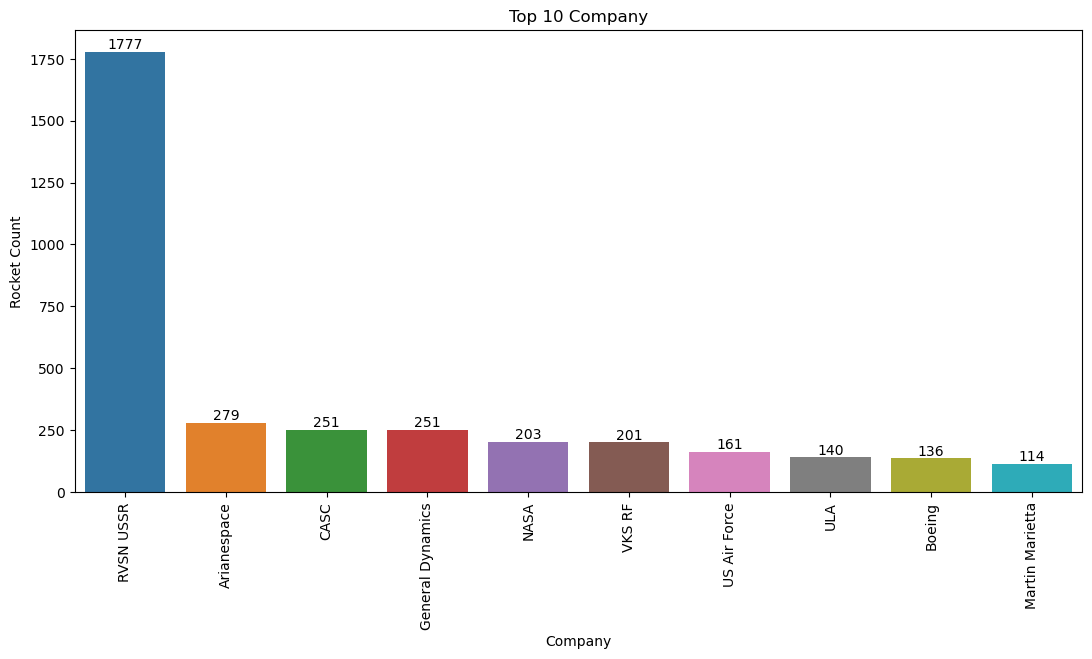

In [19]:
plt.figure(figsize=(13,6))
sns.barplot(data= top_10_company, x="Company Name", y="count")
plt.xlabel("Company")
plt.ylabel("Rocket Count")
plt.title("Top 10 Company")
plt.xticks(rotation=90)
for index, value in enumerate(top_10_company["count"]):
    plt.text(index, value, str(value), ha='center', va='bottom')

- Diğer değerlerin birbirine yakınlığından dolayı önce barların üstüne değerlerin yazılmasının daha anlamlı olacağını düşünüyor, sonrasında daha dinamik olan plotly express kütüphanesini kullanıyorum.

In [20]:
px.bar(data_frame= top_10_company, x="Company Name", y= "count",color= "Company Name", labels={"count":"Launch Count"},
       title="Top 10 Companies by Launches")

#### Lokasyon düzenlemeleri:

- Fırlatmaların hangi ülkelerden yapıldığını görmek için, öncelikle lokasyon sütunundan, yeni bir 'ülke' sütunu oluşturuyor ve coğrafi bir harita yapıyorum. 

In [21]:
liste = df["Location"]
liste2 = []
for i in liste:
    i = i.split(",")[-1].strip()
    liste2.append(i)
df["Country"] = liste2

In [22]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [23]:
harita = df["Country"].value_counts().reset_index()
harita

,Country,count
0,Russia,1395
1,USA,1344
2,Kazakhstan,701
3,France,303
4,China,268
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,New Zealand,13
9,Iran,13


- Fırlatmların ağırlıklı olarak Doğu ülkelerinde yapıldığı, başı Rusya, Kazakistan ve Çin'in çektiği görülüyor, Batı'da ise tabii ki ABD başı çekiyor.

In [24]:
px.choropleth(data_frame=harita, locations="Country",locationmode="country names",hover_name="Country",color="count",
             labels={"count":"Total Rocket Count"},title="Rockets Sent From Countries",width=700,height=450)

#### Rocket sütunuyla ilgili düzenlemeler:

In [25]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


- Rocket sütununun daha önceden boş değerler olduğunu gözlemlemiştik. Sütun içindeki verilerin tiplerini kontrol ediyorum.

In [26]:
df.isnull().any()

Company Name      False
Location          False
Datum             False
Detail            False
Status Rocket     False
 Rocket            True
Status Mission    False
Country           False
dtype: bool

In [27]:
# a = list(df[" Rocket"])
# for i in a:
#    print(type(i))

- Hepsini numerik değerlere çeviriyor ve boş olanlara ise NaN değeri atıyorum.

In [28]:
df[" Rocket"] = pd.to_numeric(df[" Rocket"],errors="coerce")
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


- Sütundaki değerlerin dağılımına bakıp, sola yatık olmasından dolayı boş değerleri medyan ile dolduruyorum

<Axes: >

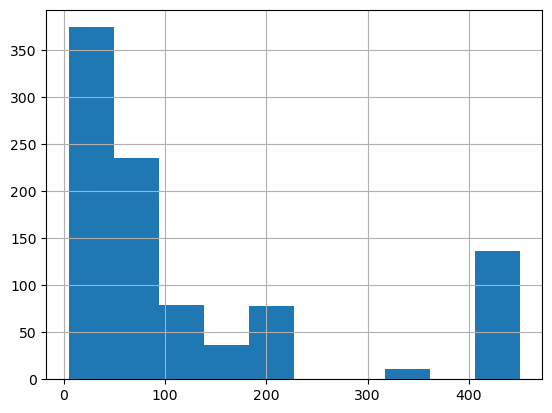

In [29]:
df[" Rocket"].hist()

In [30]:
df[" Rocket"].fillna(df[" Rocket"].median(),inplace=True)

In [31]:
df.isnull().any()

Company Name      False
Location          False
Datum             False
Detail            False
Status Rocket     False
 Rocket           False
Status Mission    False
Country           False
dtype: bool

- Rahat kullanmak ve anlaşılabilirlik açısından sütun adını 'Rocket Cost' olarak değiştiriyor ve önündeki boşluğu siliyorum.

In [32]:
df.rename(columns={" Rocket":"Rocket Cost"},inplace=True)

In [33]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Cost,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


#### Roket için toplamda en çok para harcayan 20 kuruluşu gruplandırıyor ve px ile görselleştiriyorum

In [34]:
company_money = df.groupby("Company Name")[["Rocket Cost"]].sum().sort_values(by="Rocket Cost",ascending=False).head(20).reset_index()
company_money

,Company Name,Rocket Cost
0,RVSN USSR,110174.00
1,NASA,65354.00
2,Arianespace,27691.00
3,ULA,17402.00
4,General Dynamics,15562.00
5,CASC,12106.26
6,VKS RF,11964.90
7,US Air Force,9920.92
8,Boeing,9239.00
9,Martin Marietta,7231.40


- En çok fırlatma yapan kuruluşlar ile bu grafiği karşılaştırınca, NASA'nın üst sıralara çıktığı ve Rusya ile farkı indirdiği gözüküyor. Buradan NASA'nın operasyonlarına daha fazla para harcandığı ve/veya daha büyük fırlatma operasyonları yaptığı yorumu yapılabilir.

In [35]:
px.bar(data_frame=company_money, x="Rocket Cost", y="Company Name",color="Company Name",title="Total Money Spent by Companies on Rockets(millon$)",height=600)

#### Tarih sütunu

In [36]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Cost,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


- Datum sütunu içindeki veriler datetime veri tipine dönüştürülüyor ve uygun formatta olmayanlara boş değer atanıyor

In [37]:
df["Datum"] = pd.to_datetime(df["Datum"],errors="coerce")

In [38]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Cost,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


- Boş değerlerin sayısı az olduğundan dolayı bunları silmeyi tercih ediyorum.

In [39]:
df.isnull().any()

Company Name      False
Location          False
Datum              True
Detail            False
Status Rocket     False
Rocket Cost       False
Status Mission    False
Country           False
dtype: bool

In [40]:
df["Datum"].isnull().sum()

126

In [41]:
df.dropna(subset="Datum",inplace=True)

- datetime formatina dönüştürdüğümüz 'Datum' kolonundan, yıl değerlerini tutan yeni bir kolon oluşturuluyor.

In [42]:
df["Year"] = df["Datum"].apply(lambda x:x.year)

In [43]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Cost,Status Mission,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020


#### 10 yıllık aralıklar içinde aktif ve pasif roketlerin sayısı ile ilgili bir görselleştrime

##### Bu grafiğe bakarak 
- 1980 öncesi fırlatma yapılan tüm roketlerin pasif durumda olduğu, 
- 2000'li yılların sonlarına doğru aktif ve pasif roket sayısının eşit olduğu,
- 2010 sonrası aktif durumdaki roketlerin pasiflerden daha fazla olduğu

yorumları yapılabilir.

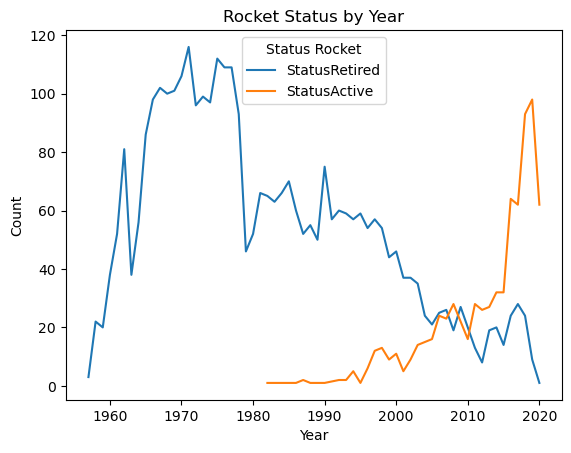

In [44]:
year_Rocketstatus = df.groupby(["Year","Status Rocket"]).size().sort_values().reset_index(name="Count")

sns.lineplot(data=year_Rocketstatus, x="Year", y="Count", hue="Status Rocket")
plt.title("Rocket Status by Year");

#### Fırlatmaların başarı ve başarısızlık durumları ve yıllara göre toplam fırlatma sayısı ile ilgili görselleştirme

In [45]:
year_MissStat = df.groupby(["Year","Status Mission"]).size().reset_index(name="Count").sort_values(by="Status Mission",ascending=False)
year_MissStat

,Year,Status Mission,Count
174,2020,Success,57
156,2014,Success,50
137,2007,Success,45
105,1994,Success,56
39,1970,Success,92
...,...,...,...
78,1985,Failure,5
75,1984,Failure,1
73,1983,Failure,1
70,1982,Failure,3


##### Bu grafiğe göre;
- 1960'daki eşitlenmeden sonra,günümüze kadar yapılan fırlatmaların ezici çoğunluğunun başarı ile sonuçlandığı,
- Fırlatma öncesindeki başarısızlık oranının çok düşük olduğu,
- Soğuk Savaş ve Uzay Yarışının yaşandığı yıllarda büyük artış gösterdiği ve 2010'ların sonuna kadar bir daha bu düzeylere çıkamadığı,
- Soğuk savaşın yumuşama ve bitimine müteakip 35 senelik aralıkta ortalama bir seyirde izlediği,

yorumları yapılabilir.

In [46]:
px.bar(data_frame=year_MissStat, x="Year", y="Count", color="Status Mission", 
       color_discrete_map={"Success": "green", "Failure": "red","Partial Failure":"orange",'Prelaunch Failure':"blue"},
       width=1240)

#### K en yakın komuşu modelinin veri seti üzerind denenmesi:

In [47]:
df["Status Mission"].value_counts()

Status Mission
Success              3794
Failure               300
Partial Failure       102
Prelaunch Failure       2
Name: count, dtype: int64

In [48]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket Cost,Status Mission,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,62.00,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020


In [49]:
one_hot_encoded_data = pd.get_dummies(df, columns=["Company Name", "Location", "Datum", "Detail",
                                                   "Status Rocket", "Rocket Cost", "Country", "Year"])
one_hot_encoded_data

,Status Mission,Company Name_AEB,Company Name_AMBA,Company Name_ASI,Company Name_Arianespace,Company Name_Arm??e de l'Air,Company Name_Blue Origin,Company Name_Boeing,Company Name_CASC,Company Name_CASIC,...,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
0,Success,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Success,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Success,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Success,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Success,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,Failure,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4320,Success,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4321,Failure,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4322,Success,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
one_hot_encoded_data.shape

(4198, 8690)

In [51]:
X = one_hot_encoded_data.drop("Status Mission", axis=1)
y = one_hot_encoded_data["Status Mission"]

In [52]:
X.head()

,Company Name_AEB,Company Name_AMBA,Company Name_ASI,Company Name_Arianespace,Company Name_Arm??e de l'Air,Company Name_Blue Origin,Company Name_Boeing,Company Name_CASC,Company Name_CASIC,Company Name_CECLES,...,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaler = ss.fit_transform(X)
df_X = pd.DataFrame(X_scaler)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_X,y,test_size=0.3,random_state=15)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [56]:
knn_model = knn.fit(X_train,y_train)

In [57]:
y_pred = knn_model.predict(X_test.values)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

##### Modeldeki Sıkıntılar:
- 4 durumdan 'success' durumu diğerlerine göre gözle görülür derecede fazla olduğu için model diğer durumları yeterince öğrenemiyor.
- Bu yüzden modelin doğruluk skoru yüksek çıksa da ezber yapmış olma ihtimali yüksek


c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

Classification Report is:
                    precision    recall  f1-score   support

          Failure       1.00      0.01      0.02        84
  Partial Failure       0.00      0.00      0.00        42
Prelaunch Failure       0.00      0.00      0.00         1
          Success       0.90      1.00      0.95      1133

         accuracy                           0.90      1260
        macro avg       0.47      0.25      0.24      1260
     weighted avg       0.88      0.90      0.85      1260


 F1:
 0.8534087559215436

 Precision score is:
 0.875880958684771

 Recall score is:
 0.9

 Confusion Matrix:

[[   1    0    0   83]
 [   0    0    0   42]
 [   0    0    0    1]
 [   0    0    0 1133]]


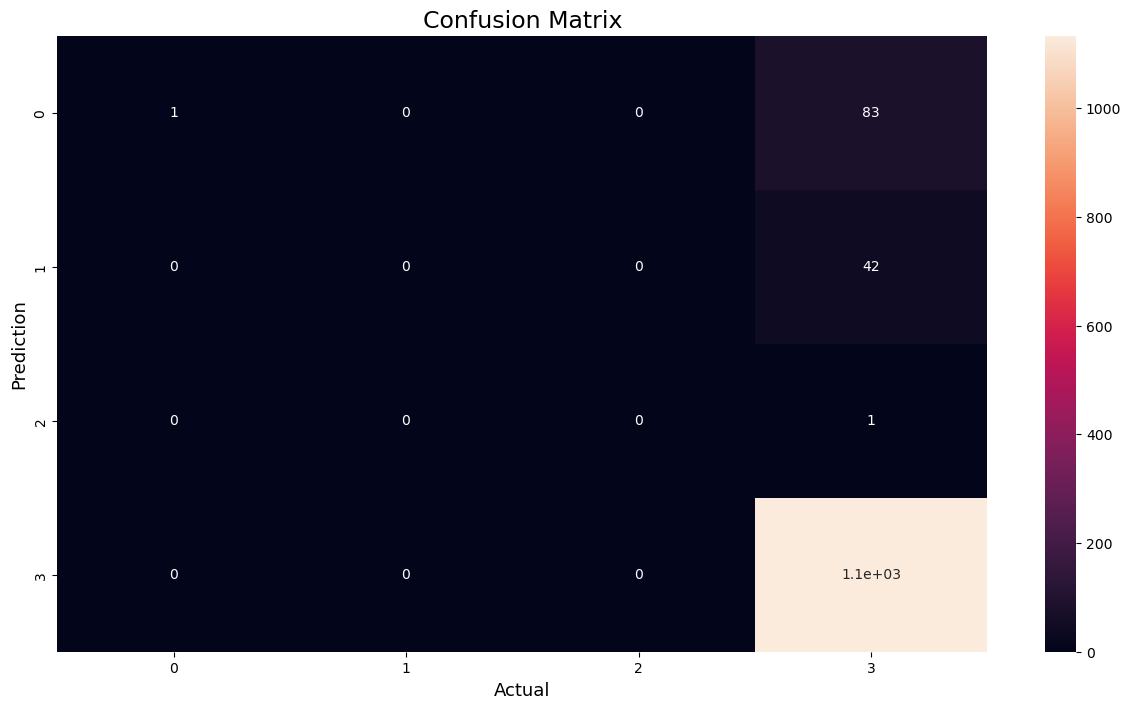

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred,average="weighted"))
print("\n Precision score is:\n",precision_score(y_test,y_pred,average="weighted"))
print("\n Recall score is:\n",recall_score(y_test,y_pred,average="weighted"))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))

plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()